In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('Connect_Mobile__Attrition_Data_file.csv')

print(dataset.shape)

(100000, 10)


In [3]:
dataset.head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


## Check for balanced dataset

<AxesSubplot:xlabel='active_cust', ylabel='count'>

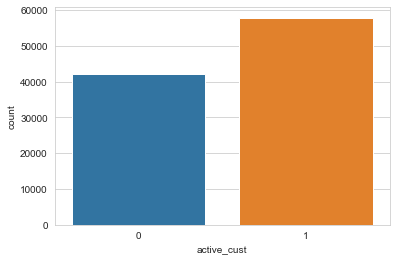

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='active_cust',data=dataset)

## Missing Values

In [5]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   active_cust                 100000 non-null  int64  
 1   income                      100000 non-null  int64  
 2   expenditure                 100000 non-null  float64
 3   months_on_network           100000 non-null  int64  
 4   Num_complaints              100000 non-null  int64  
 5   number_plan_changes         100000 non-null  int64  
 6   relocated                   100000 non-null  int64  
 7   monthly_bill                100000 non-null  int64  
 8   technical_issues_per_month  100000 non-null  int64  
 9   Speed_test_result           100000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 7.6 MB


## Numerical Features

In [7]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  10


In [8]:
dataset[numerical_features].head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


## Categorical features

In [9]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [10]:
discrete_feature

['active_cust',
 'Num_complaints',
 'number_plan_changes',
 'relocated',
 'technical_issues_per_month']

In [11]:
discrete_feature.remove('active_cust')

In [12]:
discrete_feature

['Num_complaints',
 'number_plan_changes',
 'relocated',
 'technical_issues_per_month']

In [13]:
dataset[discrete_feature].head()

,Num_complaints,number_plan_changes,relocated,technical_issues_per_month
0,4,1,0,4
1,4,1,0,4
2,4,1,0,4
3,4,1,0,4
4,4,1,0,4


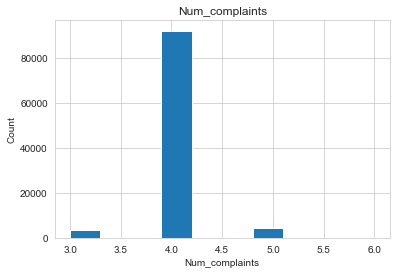

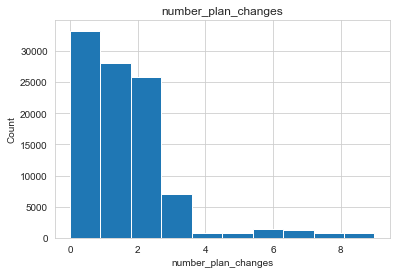

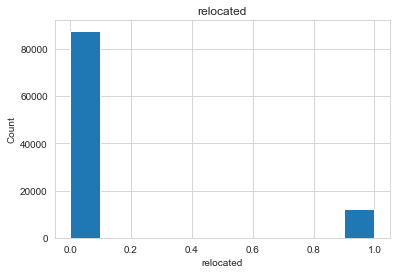

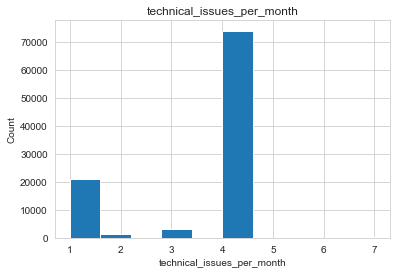

In [14]:
for feature in discrete_feature:
    plt.hist(dataset[feature]) 
    plt.title("histogram") 
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_complaints', ylabel='count'>

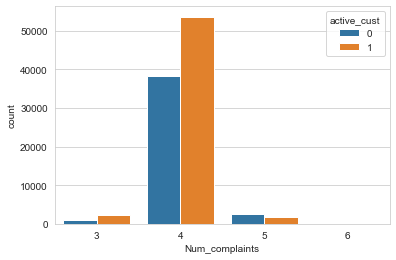

In [36]:
sns.countplot(discrete_feature[0],data=dataset,hue='active_cust')

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_plan_changes', ylabel='count'>

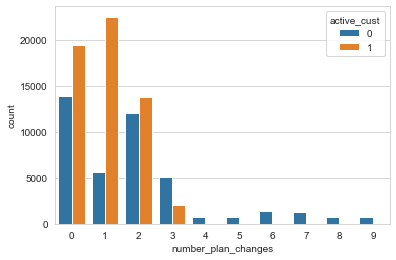

In [37]:
sns.countplot(discrete_feature[1],data=dataset,hue='active_cust')

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relocated', ylabel='count'>

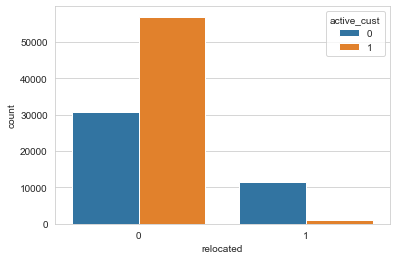

In [38]:
sns.countplot(discrete_feature[2],data=dataset,hue='active_cust')

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='technical_issues_per_month', ylabel='count'>

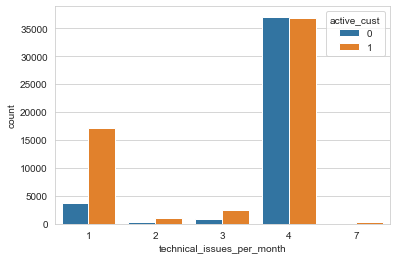

In [39]:
sns.countplot(discrete_feature[3],data=dataset,hue='active_cust')

<AxesSubplot:xlabel='Num_complaints', ylabel='number_plan_changes'>

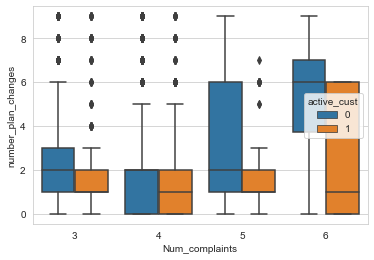

In [19]:
sns.boxplot(x=dataset[discrete_feature[0]], y=dataset[discrete_feature[1]], hue=dataset['active_cust'],data=dataset)

<AxesSubplot:xlabel='relocated', ylabel='technical_issues_per_month'>

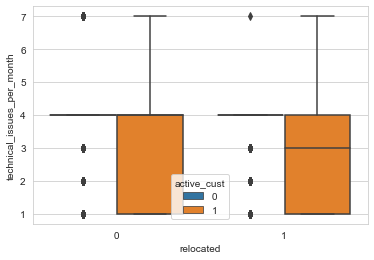

In [20]:
sns.boxplot(x=dataset[discrete_feature[2]], y=dataset[discrete_feature[3]], hue=dataset['active_cust'],data=dataset)

## Numerical features

In [21]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 6


In [22]:
continuous_feature.remove('active_cust')

In [40]:
continuous_feature

['income',
 'expenditure',
 'months_on_network',
 'monthly_bill',
 'Speed_test_result']

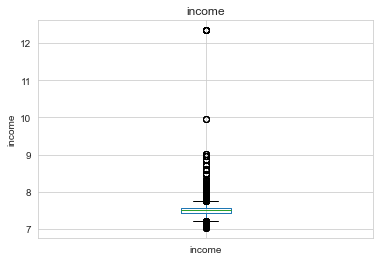

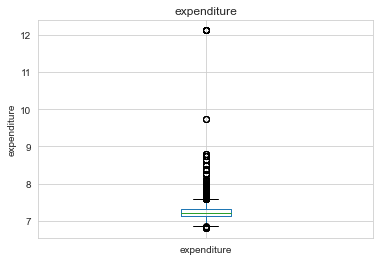

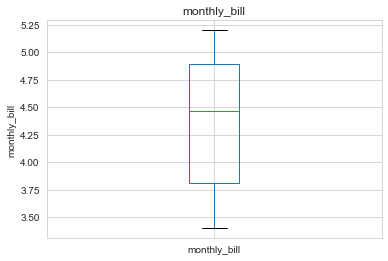

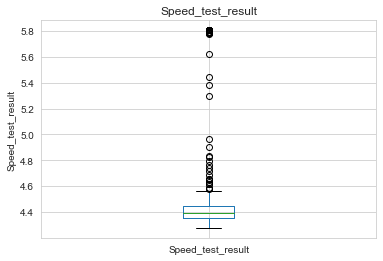

In [23]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [24]:
dataset[continuous_feature].corr()

,income,expenditure,months_on_network,monthly_bill,Speed_test_result
income,1.000000,0.998436,-0.122607,-0.004715,0.010451
expenditure,0.998436,1.000000,-0.118989,-0.006006,0.015505
months_on_network,-0.122607,-0.118989,1.000000,0.008030,0.020413
monthly_bill,-0.004715,-0.006006,0.008030,1.000000,-0.000345
Speed_test_result,0.010451,0.015505,0.020413,-0.000345,1.000000


<AxesSubplot:>

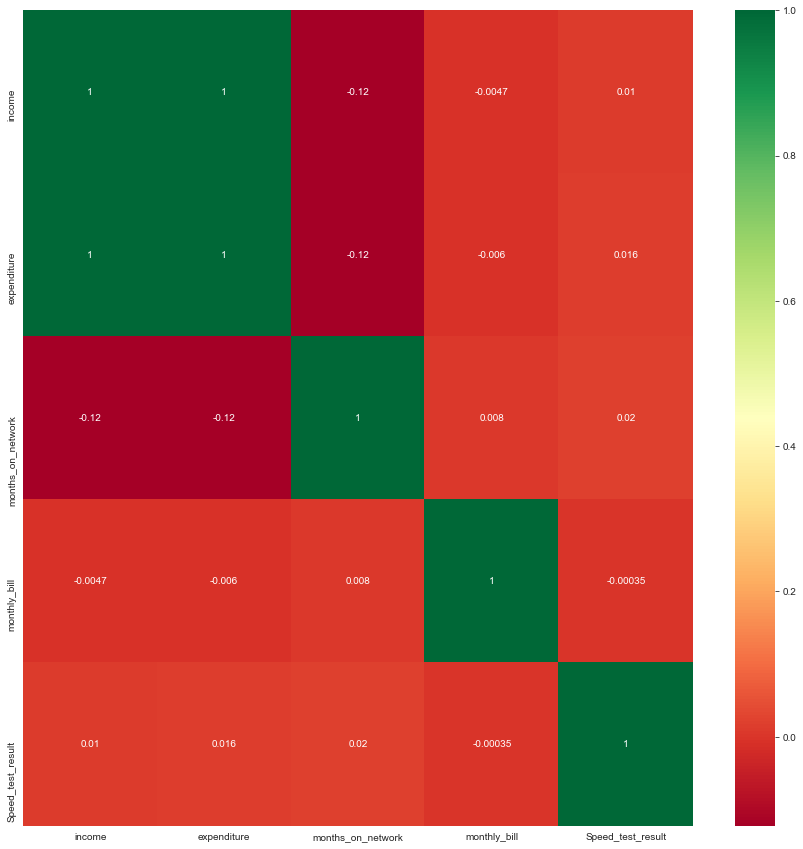

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset[continuous_feature].corr(),annot=True,cmap="RdYlGn")

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


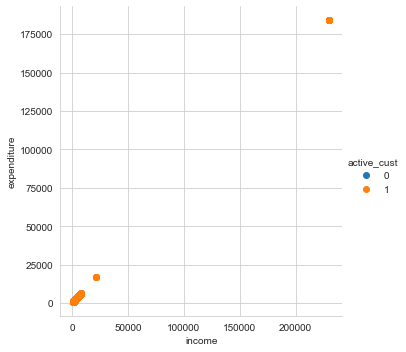

In [26]:
sns.FacetGrid(dataset,hue="active_cust",size=5).map(plt.scatter,continuous_feature[0],continuous_feature[1]).add_legend();
plt.show()

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


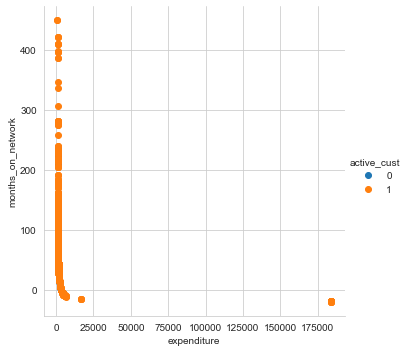

In [27]:
sns.FacetGrid(dataset,hue="active_cust",size=5).map(plt.scatter,continuous_feature[1],continuous_feature[2]).add_legend();
plt.show()

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


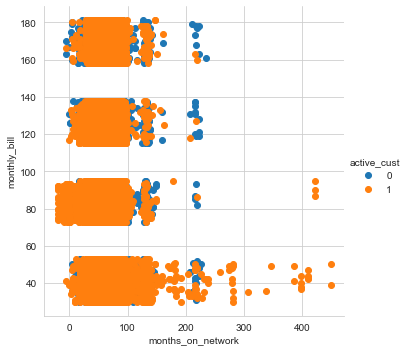

In [28]:
sns.FacetGrid(dataset,hue="active_cust",size=5).map(plt.scatter,continuous_feature[2],continuous_feature[3]).add_legend();
plt.show()

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_bill'>

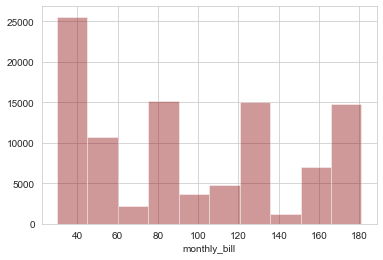

In [29]:
sns.distplot(dataset[continuous_feature[3]].dropna(),kde=False,color='darkred',bins=10)

In [30]:
df_active=dataset.loc[dataset['active_cust']==0]
df_left=dataset.loc[dataset['active_cust']==1]

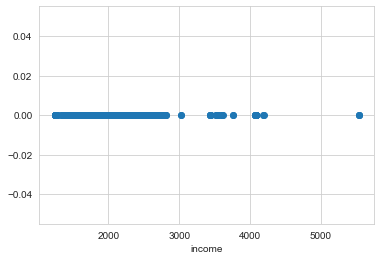

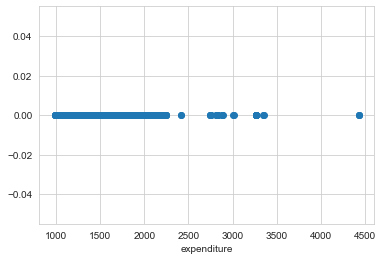

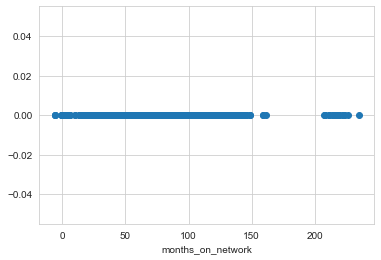

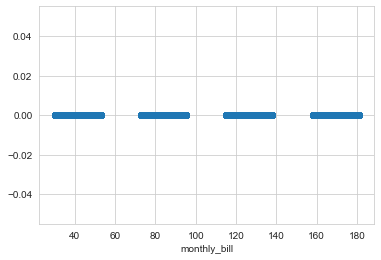

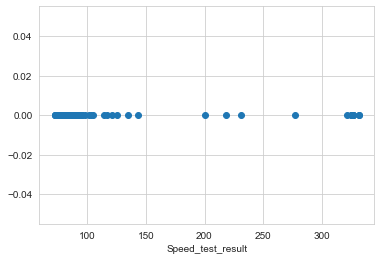

In [43]:
for feature in continuous_feature:
    plt.plot(df_active[feature],np.zeros_like(df_active[feature]),'o')
    plt.xlabel(feature)
    plt.show()

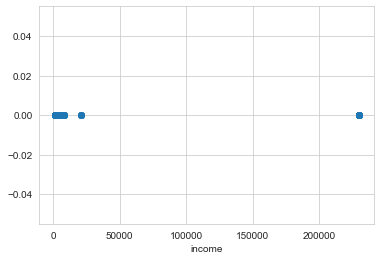

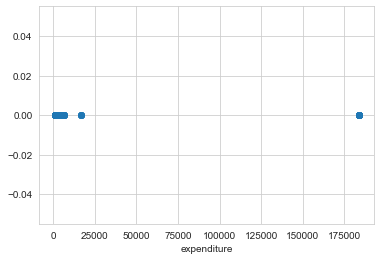

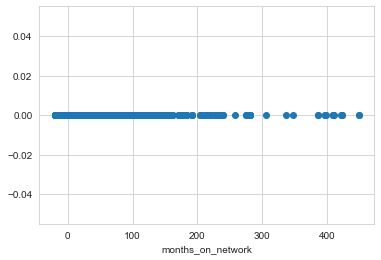

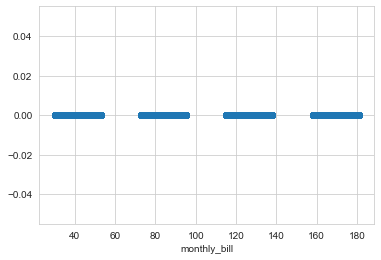

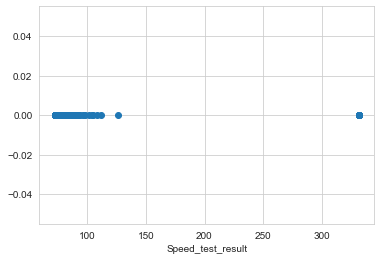

In [44]:
for feature in continuous_feature:
    plt.plot(df_left[feature],np.zeros_like(df_left[feature]),'o')
    plt.xlabel(feature)
    plt.show()